In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from IPython.display import display
from datetime import datetime
import tensorflow.keras.metrics as keras_metrics
import tensorflow as tf

# Загрузка данных
df = pd.read_csv('advertising.csv')
y_raw = df['Clicked on Ad']
X_raw = df.drop(['Clicked on Ad'], axis=1)
X_raw

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54


In [96]:
Topic = X_raw['Ad Topic Line'].unique()
City = X_raw['City'].unique()
Country = X_raw['Country'].unique()
TopicIdx = dict([[name, idx] for idx, name in enumerate(Topic)])
CityIdx = dict([[name, idx] for idx, name in enumerate(City)])
CountryIdx = dict([[name, idx] for idx, name in enumerate(Country)])

TimestampTime = [int(datetime.strptime(row, '%Y-%m-%d %H:%M:%S').strftime("%s")) for row in X_raw['Timestamp']]
AdTopicLineQuant = [TopicIdx[row] for row in X_raw['Ad Topic Line']]
CityQuant = [CityIdx[row] for row in X_raw['City']]
CountryQuant = [CountryIdx[row] for row in X_raw['Country']]

X = pd.DataFrame()
X["Timestamp"] = TimestampTime
X["Daily Time Spent on Site"] = X_raw["Daily Time Spent on Site"]
X["Age"] = X_raw["Age"]
X["Area Income"] = X_raw["Area Income"]
X["Daily Internet Usage"] = X_raw["Daily Internet Usage"]
X["Male"] = X_raw["Male"]
X["Ad Topic Line"] = AdTopicLineQuant
X["City"] = CityQuant
X["Country"] = CountryQuant
display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y_raw, test_size=0.15, random_state=42)

,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Ad Topic Line,City,Country
0,1459029191,68.95,35,61833.90,256.09,0,0,0,0
1,1459723142,80.23,31,68441.85,193.77,1,1,1,1
2,1457890542,69.47,26,59785.94,236.50,0,2,2,2
3,1452382279,74.15,29,54806.18,245.89,1,3,3,3
4,1464914178,68.37,35,73889.99,225.58,0,4,4,4
...,...,...,...,...,...,...,...,...,...
995,1455216540,72.97,30,71384.57,208.58,1,995,965,86
996,1461280021,51.30,45,67782.17,134.42,1,996,966,13
997,1454336697,51.63,51,42415.72,120.37,1,997,967,117
998,1458776154,55.55,19,41920.79,187.95,0,998,833,59


In [97]:
import tensorflow as tf
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os

# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

print(tf.__version__)
# To make the results reproducible, set the random seed value.
tf.random.set_seed(22)

2.10.0


In [98]:
class Normalize(tf.Module):
    def __init__(self, x):
    # Initialize the mean and standard deviation for normalization
        self.mean = tf.Variable(tf.math.reduce_mean(x, axis=0))
        self.std = tf.Variable(tf.math.reduce_std(x, axis=0))

    def norm(self, x):
        # Normalize the input
        return (x - self.mean)/self.std

    def unnorm(self, x):
        # Unnormalize the input
        return (x * self.std) + self.mean

X = tf.convert_to_tensor(X.to_numpy(), dtype=tf.float32)
X_train = tf.convert_to_tensor(X_train.to_numpy(), dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test.to_numpy(), dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.to_numpy(), dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.to_numpy(), dtype=tf.float32)

norm_x = Normalize(X)
x_train_norm, x_test_norm = norm_x.norm(X_train), norm_x.norm(X_test)

In [99]:
def log_loss(y_pred, y):
      # Compute the log loss function
  ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(ce)

In [128]:
class LogisticRegression(tf.keras.layers.Layer):
      
  def __init__(self, x_shape):
    super(LogisticRegression, self).__init__()
    self.built = False
    rand_w = tf.random.uniform(shape=[x_shape[-1], 1], seed=22)
    rand_b = tf.random.uniform(shape=[], seed=22)
    self.w = tf.Variable(rand_w)
    self.b = tf.Variable(rand_b)

  def call(self, x, train=True):
    # Compute the model output
    z = tf.add(tf.matmul(x, self.w), self.b)
    z = tf.squeeze(z, axis=1)
    if train:
      return z
    return tf.sigmoid(z)

In [129]:
log_reg = LogisticRegression(x_train_norm.shape)

In [130]:
y_pred = log_reg(x_train_norm[:5], train=False)
# y_pred.numpy()

InvalidArgumentError: Exception encountered when calling layer "logistic_regression_10" "                 f"(type LogisticRegression).

{{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} In[0] and In[1] has different ndims: [5,9] vs. [1] [Op:MatMul]

Call arguments received by layer "logistic_regression_10" "                 f"(type LogisticRegression):
  • x=tf.Tensor(shape=(5, 9), dtype=float32)
  • train=False

In [103]:
def predict_class(y_pred, thresh=0.5):
      # Return a tensor with  `1` if `y_pred` > `0.5`, and `0` otherwise
  return tf.cast(y_pred > thresh, tf.float32)

def accuracy(y_pred, y):
  # Return the proportion of matches between `y_pred` and `y`
  y_pred = tf.math.sigmoid(y_pred)
  y_pred_class = predict_class(y_pred)
  check_equal = tf.cast(y_pred_class == y,tf.float32)
  acc_val = tf.reduce_mean(check_equal)
  return acc_val

In [104]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
train_dataset = train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test))
test_dataset = test_dataset.shuffle(buffer_size=X_test.shape[0]).batch(batch_size)

In [105]:
# Set training parameters
epochs = 1000
learning_rate = 0.02
train_losses, test_losses = [], []
train_accs, test_accs = [], []
optimizer = tf.keras.optimizers.Ftrl(learning_rate=learning_rate)

# Set up the training loop and begin training
for epoch in range(epochs):
  batch_losses_train, batch_accs_train = [], []
  batch_losses_test, batch_accs_test = [], []

  # Iterate over the training data
  for x_batch, y_batch in train_dataset:
    with tf.GradientTape() as tape:
      y_pred_batch = log_reg(x_batch)
      batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Update the parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, log_reg.variables)
    optimizer.apply_gradients(zip(grads, log_reg.trainable_weights))
    # Keep track of batch-level training performance
    batch_losses_train.append(batch_loss)
    batch_accs_train.append(batch_acc)

  # Iterate over the testing data
  for x_batch, y_batch in test_dataset:
    y_pred_batch = log_reg(x_batch)
    batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Keep track of batch-level testing performance
    batch_losses_test.append(batch_loss)
    batch_accs_test.append(batch_acc)

  # Keep track of epoch-level model performance
  train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
  test_loss, test_acc = tf.reduce_mean(batch_losses_test), tf.reduce_mean(batch_accs_test)
  train_losses.append(train_loss)
  train_accs.append(train_acc)
  test_losses.append(test_loss)
  test_accs.append(test_acc)
  if epoch % 20 == 0:
    print(f"Epoch: {epoch}, Training log loss: {train_loss:.3f}")

Epoch: 0, Training log loss: 0.822
Epoch: 20, Training log loss: 0.367
Epoch: 40, Training log loss: 0.283
Epoch: 60, Training log loss: 0.244
Epoch: 80, Training log loss: 0.214
Epoch: 100, Training log loss: 0.203
Epoch: 120, Training log loss: 0.180
Epoch: 140, Training log loss: 0.172
Epoch: 160, Training log loss: 0.162
Epoch: 180, Training log loss: 0.159
Epoch: 200, Training log loss: 0.161
Epoch: 220, Training log loss: 0.146
Epoch: 240, Training log loss: 0.145
Epoch: 260, Training log loss: 0.135
Epoch: 280, Training log loss: 0.134
Epoch: 300, Training log loss: 0.133
Epoch: 320, Training log loss: 0.134
Epoch: 340, Training log loss: 0.129
Epoch: 360, Training log loss: 0.125
Epoch: 380, Training log loss: 0.119
Epoch: 400, Training log loss: 0.121
Epoch: 420, Training log loss: 0.121
Epoch: 440, Training log loss: 0.121
Epoch: 460, Training log loss: 0.116
Epoch: 480, Training log loss: 0.118
Epoch: 500, Training log loss: 0.112
Epoch: 520, Training log loss: 0.111
Epoch: 

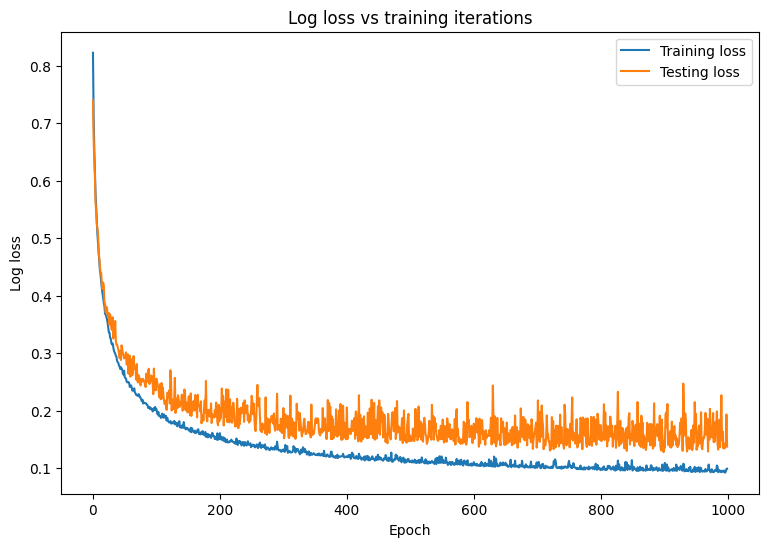

In [110]:
plt.plot(range(epochs), train_losses, label = "Training loss")
plt.plot(range(epochs), test_losses, label = "Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()
plt.title("Log loss vs training iterations");

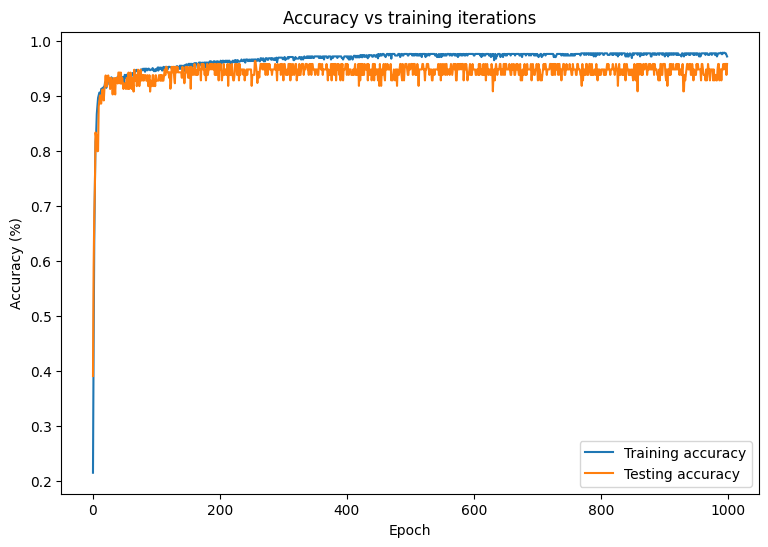

In [111]:
plt.plot(range(epochs), train_accs, label = "Training accuracy")
plt.plot(range(epochs), test_accs, label = "Testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy vs training iterations");

In [108]:
def show_confusion_matrix(y, y_classes, typ):
      # Compute the confusion matrix and normalize it
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(y.numpy(), y_classes.numpy())
  confusion_normalized = confusion / confusion.sum(axis=1)
  axis_labels = range(2)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title(f"Confusion matrix: {typ}")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

y_pred_train, y_pred_test = log_reg(x_train_norm, train=False), log_reg(x_test_norm, train=False)
train_classes, test_classes = predict_class(y_pred_train), predict_class(y_pred_test)

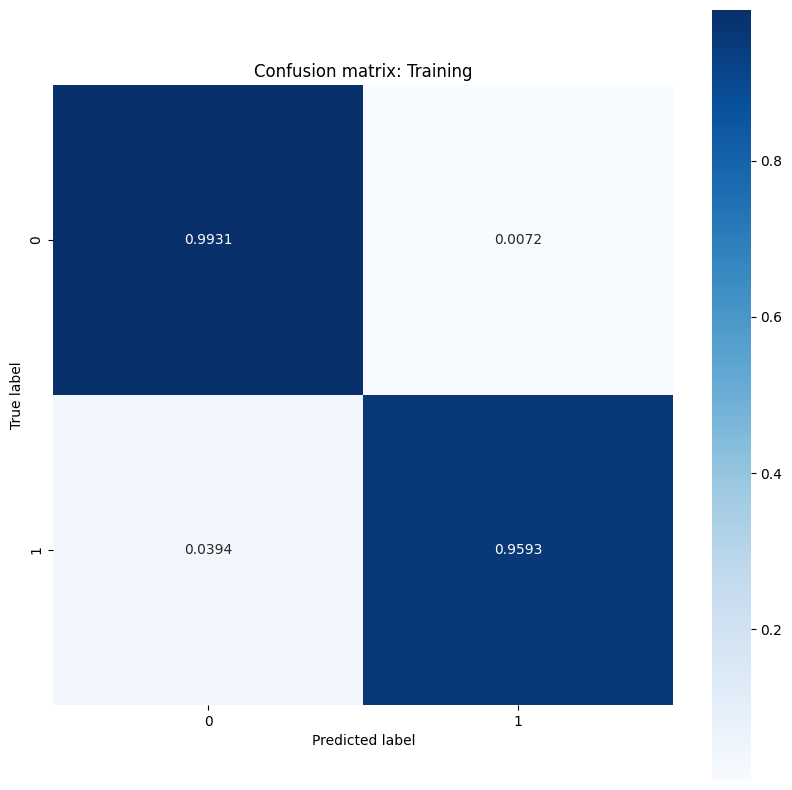

In [109]:
show_confusion_matrix(y_train, train_classes, 'Training')

In [118]:
# Set training parameters

log_reg = LogisticRegression(x_train_norm.shape)
epochs = 1000
learning_rate = 0.02
train_losses, test_losses = [], []
train_accs, test_accs = [], []
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Set up the training loop and begin training
for epoch in range(epochs):
  batch_losses_train, batch_accs_train = [], []
  batch_losses_test, batch_accs_test = [], []

  # Iterate over the training data
  for x_batch, y_batch in train_dataset:
    with tf.GradientTape() as tape:
      y_pred_batch = log_reg(x_batch)
      batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Update the parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, log_reg.variables)
    optimizer.apply_gradients(zip(grads, log_reg.trainable_weights))
    # Keep track of batch-level training performance
    batch_losses_train.append(batch_loss)
    batch_accs_train.append(batch_acc)

  # Iterate over the testing data
  for x_batch, y_batch in test_dataset:
    y_pred_batch = log_reg(x_batch)
    batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Keep track of batch-level testing performance
    batch_losses_test.append(batch_loss)
    batch_accs_test.append(batch_acc)

  # Keep track of epoch-level model performance
  train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
  test_loss, test_acc = tf.reduce_mean(batch_losses_test), tf.reduce_mean(batch_accs_test)
  train_losses.append(train_loss)
  train_accs.append(train_acc)
  test_losses.append(test_loss)
  test_accs.append(test_acc)
  if epoch % 20 == 0:
    print(f"Epoch: {epoch}, Training log loss: {train_loss:.3f}")

Epoch: 0, Training log loss: 1.533
Epoch: 20, Training log loss: 0.109
Epoch: 40, Training log loss: 0.086
Epoch: 60, Training log loss: 0.081
Epoch: 80, Training log loss: 0.099
Epoch: 100, Training log loss: 0.077
Epoch: 120, Training log loss: 0.076
Epoch: 140, Training log loss: 0.093
Epoch: 160, Training log loss: 0.076
Epoch: 180, Training log loss: 0.077
Epoch: 200, Training log loss: 0.079
Epoch: 220, Training log loss: 0.075
Epoch: 240, Training log loss: 0.076
Epoch: 260, Training log loss: 0.075
Epoch: 280, Training log loss: 0.075
Epoch: 300, Training log loss: 0.076
Epoch: 320, Training log loss: 0.075
Epoch: 340, Training log loss: 0.080
Epoch: 360, Training log loss: 0.081
Epoch: 380, Training log loss: 0.082
Epoch: 400, Training log loss: 0.078
Epoch: 420, Training log loss: 0.078
Epoch: 440, Training log loss: 0.092
Epoch: 460, Training log loss: 0.077
Epoch: 480, Training log loss: 0.077
Epoch: 500, Training log loss: 0.076
Epoch: 520, Training log loss: 0.076
Epoch: 

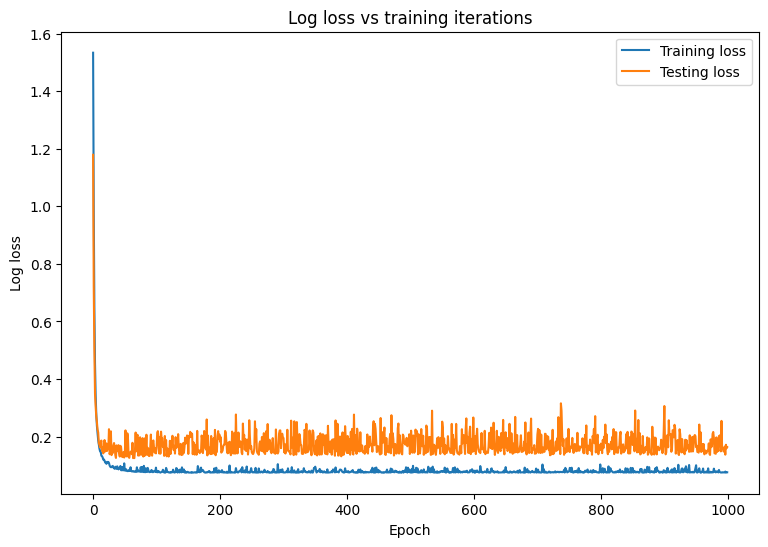

In [119]:
plt.plot(range(epochs), train_losses, label = "Training loss")
plt.plot(range(epochs), test_losses, label = "Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()
plt.title("Log loss vs training iterations");

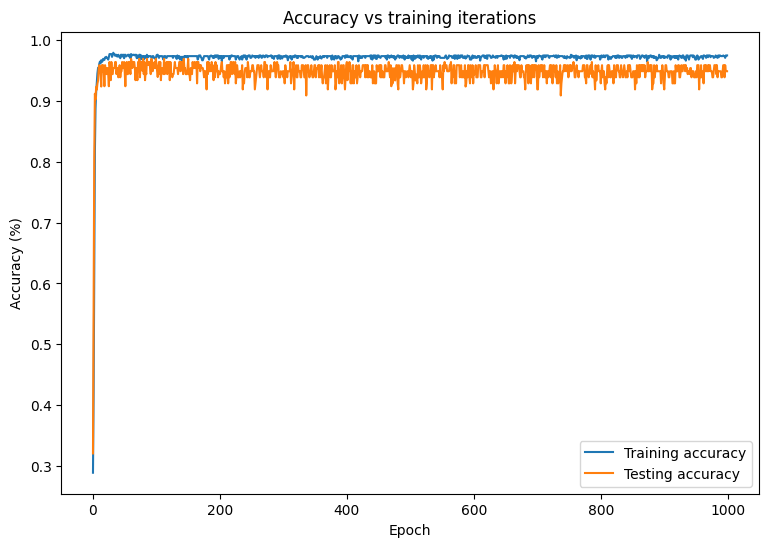

In [120]:
plt.plot(range(epochs), train_accs, label = "Training accuracy")
plt.plot(range(epochs), test_accs, label = "Testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy vs training iterations");

In [123]:
def show_confusion_matrix(y, y_classes, typ):
      # Compute the confusion matrix and normalize it
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(y.numpy(), y_classes.numpy())
  confusion_normalized = confusion / confusion.sum(axis=1)
  axis_labels = range(2)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title(f"Confusion matrix: {typ}")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

y_pred_train, y_pred_test = log_reg(x_train_norm, train=False), log_reg(x_test_norm, train=False)
train_classes, test_classes = predict_class(y_pred_train), predict_class(y_pred_test)

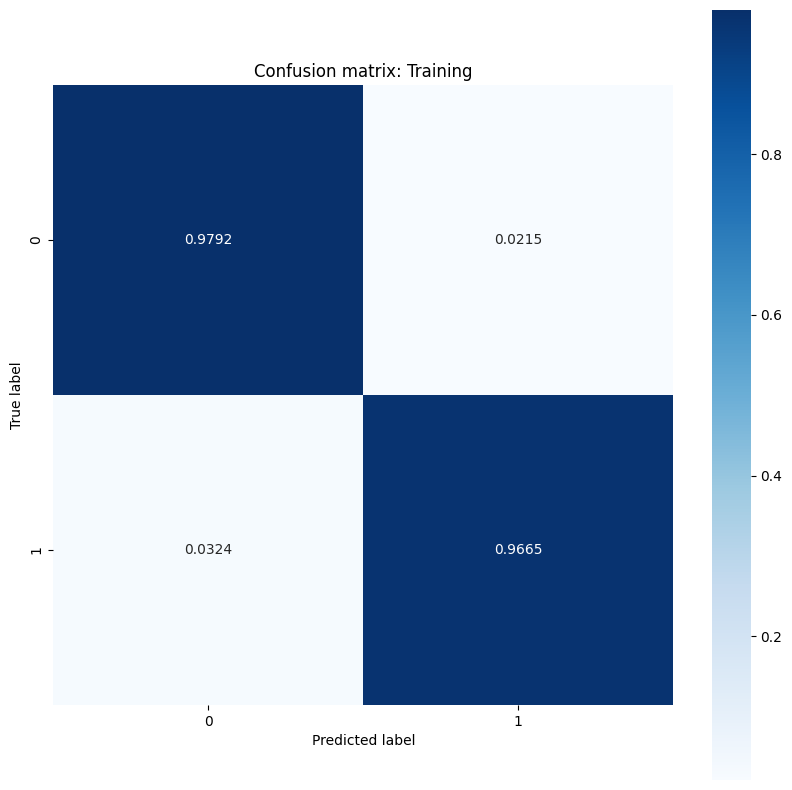

In [125]:
show_confusion_matrix(y_train, train_classes, 'Training')